In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

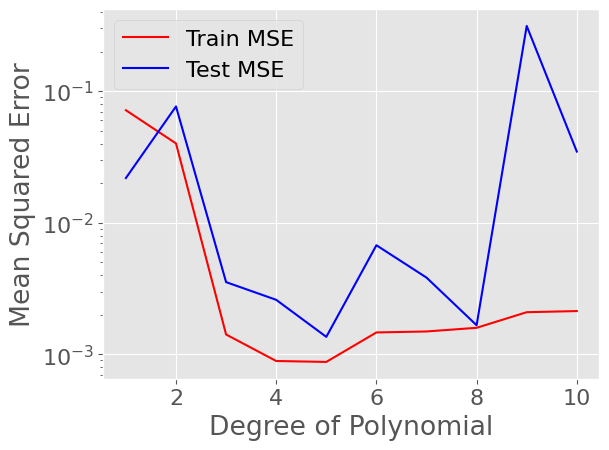

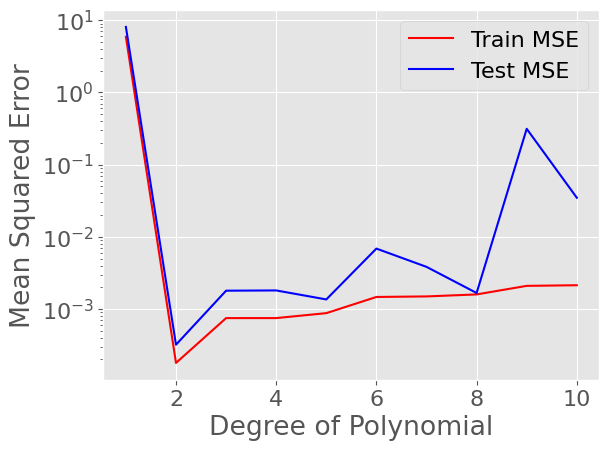

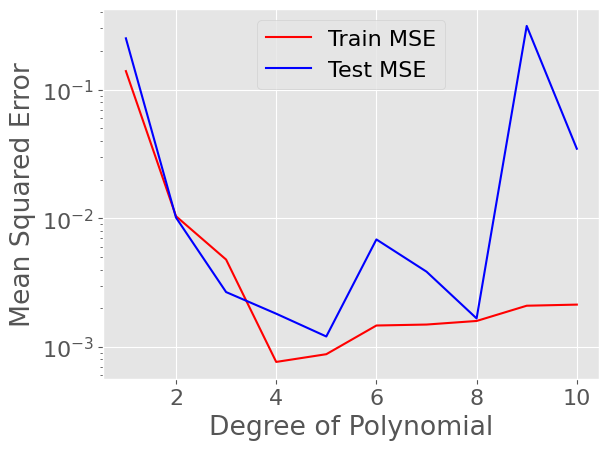

In [44]:
funciones = [lambda x: np.sin(x), lambda x: 2 * -x**2 + 1, lambda x: np.cos(x)]
m = 40

def graficadora(funciones, m):
    # Generar datos de entrenamiento y prueba
    x = np.sort(np.random.normal(loc=0, scale=1, size=m))
    x_test = np.sort(np.random.normal(loc=0, scale=1, size=int(m * 0.3) + 1))
    e = np.random.normal(loc=0, scale=0.1, size=m)  # Reducir el ruido

    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x.reshape(-1, 1))
    x_test_scaled = scaler.transform(x_test.reshape(-1, 1))

    for f in funciones:
        y = f(x) + e

        coleccion_msetest = []
        coleccion_msetrain = []

        for i in range(1, 11):  # Reducir el rango de grados
            poly = PolynomialFeatures(degree=i)
            model = LinearRegression()

            x_poly = poly.fit_transform(x_scaled)  # Usar los datos normalizados
            model.fit(x_poly, y)
            y_pred = model.predict(x_poly)

            x_test_poly = poly.transform(x_test_scaled)  # Usar los datos normalizados
            y_test = model.predict(x_test_poly)

            mse_train = np.mean((y_pred - f(x))**2)
            mse_test = np.mean((y_test - f(x_test))**2)

            coleccion_msetrain.append(mse_train)
            coleccion_msetest.append(mse_test)

        plt.plot(range(1, 11), coleccion_msetrain, label="Train MSE", color='r')
        plt.plot(range(1, 11), coleccion_msetest, label="Test MSE", color='b')
        plt.yscale('log')
        plt.xlabel('Degree of Polynomial')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.show()

graficadora(funciones, m)

In [45]:
funciones = [lambda x: np.sin(x), lambda X : 2 * -X**2 +1, lambda x: np.cos(x)*-1]

m=30

x_l = np.sort(np.random.normal(loc=0, scale = 1, size=m))
x_LL = np.sort(np.random.normal(loc=0, scale = 1, size=int(m*0.3)+1))
e = np.random.normal(loc=0, scale = 0.3, size=m)

print(x_l)
print(x_LL)
print(e)

[-1.87392761 -1.62617947 -1.27579078 -1.21748032 -1.11843353 -1.03431762
 -1.0168177  -0.99376068 -0.95545382 -0.91544215 -0.89584311 -0.87507353
 -0.81258869 -0.545079   -0.50829205 -0.42617755 -0.35847605 -0.25324001
 -0.1896057  -0.04979205  0.22818099  0.25443875  0.26660222  0.44076701
  0.90092197  1.03987048  1.05910801  1.44998785  1.49872394  2.01256347]
[-1.0534138  -0.76979361 -0.57665599 -0.43686262  0.07793991  0.29008673
  0.57679592  0.70802891  0.84923362  1.77598363]
[ 1.00001023 -0.14820281  0.23401157  0.22476974  0.17177574  0.27526509
  0.0291534  -0.16956741  0.19704802  0.02220515  0.03462694 -0.55296819
 -0.18951665 -0.01634616  0.05783976  0.31519928  0.38141915  0.16007631
  0.12421923  0.00164539  0.11042873  0.14368802 -0.02728657  0.71546055
 -0.136625    0.54473858 -0.03378073  0.1921221  -0.02267143 -0.15228554]


In [46]:
for f in funciones:
  y = f(x_l) + e
  print(y)

[ 0.04560378 -1.14666955 -0.72278896 -0.71346076 -0.72764112 -0.5842487
 -0.8212848  -1.00765092 -0.61952777 -0.77062698 -0.74610925 -1.32055883
 -0.91558629 -0.5348318  -0.42884617 -0.09819401  0.03057159 -0.09046564
 -0.06425245 -0.04812608  0.33663477  0.39539029  0.23616864  1.14209384
  0.64727469  1.40707723  0.83813833  1.18483362  0.97473248  0.75171202]
[-5.02319916 -4.43712216 -2.02127265 -1.73974691 -1.33001137 -0.8643608
 -1.03868306 -1.14468799 -0.628736   -0.65386352 -0.57044281 -1.08447556
 -0.5101174   0.38943162  0.54111814  0.95194468  1.124409    1.0318153
  1.05231858  0.9966869   1.0062956   1.01420986  0.83055994  1.32690944
 -0.7599458  -0.61792264 -1.27720027 -3.01280741 -3.51501835 -7.25310899]
[ 1.29852041 -0.09284797 -0.05673359 -0.12124114 -0.26531616 -0.23584748
 -0.49692157 -0.71510937 -0.38019022 -0.58723493 -0.59023386 -1.19390861
 -0.87713782 -0.8714325  -0.81573726 -0.5953533  -0.55501343 -0.80802944
 -0.8578594  -0.99711524 -0.86365075 -0.82411669 -0.